In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from umap import UMAP
import PIL
import PIL.Image
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
df.isnull().sum().sort_values(ascending=False)

id      0
f_00    0
f_27    0
f_26    0
f_25    0
f_24    0
f_23    0
f_22    0
f_21    0
f_20    0
f_19    0
f_18    0
f_17    0
f_16    0
f_15    0
f_14    0
f_13    0
f_12    0
f_11    0
f_10    0
f_09    0
f_08    0
f_07    0
f_06    0
f_05    0
f_04    0
f_03    0
f_02    0
f_01    0
f_28    0
dtype: int64

In [5]:
X = df.drop(['id'], axis=1).to_numpy()
print(X.shape)

(98000, 29)


In [6]:
train_X = X[:90000,:]
test_X = X[90000:,:]
print(train_X.shape)
print(test_X.shape)

(90000, 29)
(8000, 29)


In [7]:
# X_standard = MaxAbsScaler().fit_transform(train_X)
# feat_cols = ['feature'+str(i) for i in range(X_standard.shape[1])]
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(X_standard)

# pca_df = pd.DataFrame(data = principalComponents
#              , columns=(["col0","col1","col2"]))
# pca_df.head()

In [8]:
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [9]:
# fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# ax.scatter(
#     principalComponents[:, 0],
#     principalComponents[:, 1],
#     principalComponents[:, 2],
#     cmap=plt.cm.Set1,
#     edgecolor="k",
#     s=40,
# )
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

In [10]:
# embedded_X = TSNE(n_components=3, learning_rate=50)
# tsne_features = embedded_X.fit_transform(X_standard)

# tsne_df = pd.DataFrame(data = tsne_features
#              , columns = ['tsne_feature1', 'tsne_feature2', 'tsne_feature3'])
# tsne_df.head()

In [11]:
# fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# ax.scatter(
#     tsne_df['tsne_feature1'],
#     tsne_df['tsne_feature2'],
#     tsne_df['tsne_feature3'],
#     cmap=plt.cm.Set1,
#     edgecolor="k",
#     s=40,
# )
# ax.set_title("TSNE features")
# ax.set_xlabel("1st feature")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd feature")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd feature")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

# Elbow method

100%|██████████| 29/29 [10:30<00:00, 21.72s/it]


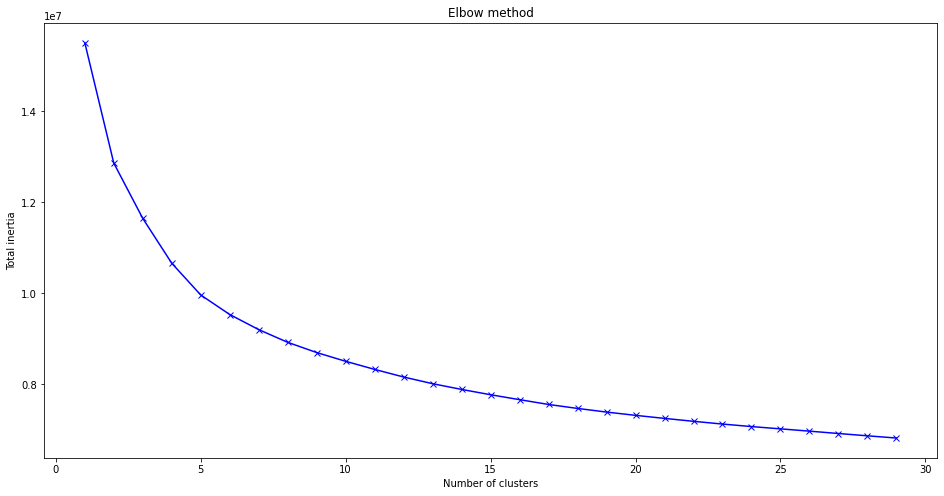

In [12]:
# inertias = []
# for k in tqdm(range(1,30)):
#     km = KMeans(n_clusters=k)
#     km.fit(train_X)
#     inertias.append(km.inertia_)

# # Plot inertias
# plt.figure(figsize=(16,8))
# plt.plot(range(1,30), inertias, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Total inertia')
# plt.title('Elbow method')
# plt.show()

In [14]:
kmeans = KMeans(n_clusters=7, random_state=1234).fit(train_X)

In [16]:
preds = kmeans.predict(X)


In [17]:
sub = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
sub['Predicted'] = preds
sub


,Id,Predicted
0,0,0
1,1,1
2,2,0
3,3,6
4,4,3
...,...,...
97995,97995,3
97996,97996,3
97997,97997,6
97998,97998,6


In [18]:
sub.to_csv('submission.csv', index=False)